In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
x_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y_labels = pd.Series(data=iris.target, name='name')

In [2]:
x_data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
y_labels.head(3)

0    0
1    0
2    0
Name: name, dtype: int32

### 레이블을 One-hot 벡터 형식으로 바꾸기
- tensorflow에서는 레이블 데이터를 원-핫 벡터 형식으로 나타내야함

In [4]:
import numpy as np
labels = {
    0:[1, 0, 0],
    1:[0, 1, 0],
    2:[0, 0, 1]
}

y_nums = np.array(list((map(lambda v:labels[v], y_labels))))
print(y_nums[:5])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


### train, test split

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data.values, y_nums, train_size=0.8)

### 데이터 학습 및 실행 테스트
- 변수 및 학습 알고리즘 정의는 필요 없음 (2.x)
- `Dense(10)` : 전결합 신경망, 유닛 수가 10개
    - `activation` : 활성화 함수
    - `input_shape` : 입력할 데이터의 차원 수
    - 최종 출력이 3차원이므로 `Dense(3)`이라고 작성
- `Sequential()` : 순차적으로 신경망을 추가하는 모델 정의
- `fit()`
    - `batch_size` : 배치 크기, 1회 게산에 사용할 데이터 수, 작게 하면 메모리 사용량이 줄어들지만 너무 작으면 학습이 제대로 이루어지지 않음
    - `epochs` : 에포크, 반복 횟수

In [6]:
from tensorflow.keras import models, layers

Model_iris = models.Sequential()
Model_iris.add(layers.Dense(10, activation='relu', input_shape=(4,)))
Model_iris.add(layers.Dense(3, activation='softmax'))

In [7]:
Model_iris.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [8]:
Model_iris.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [9]:
History_iris = Model_iris.fit(x_train, y_train,
                              epochs=300,
                              batch_size=20,
                              validation_data=(x_test, y_test))

Epoch 1/300
6/6 [==============================] - 1s 27ms/step - loss: 2.7717 - accuracy: 0.3417 - val_loss: 2.5695 - val_accuracy: 0.3000
Epoch 2/300
6/6 [==============================] - 0s 5ms/step - loss: 2.5685 - accuracy: 0.3417 - val_loss: 2.3467 - val_accuracy: 0.3000
Epoch 3/300
6/6 [==============================] - 0s 5ms/step - loss: 2.3778 - accuracy: 0.3417 - val_loss: 2.1681 - val_accuracy: 0.3000
Epoch 4/300
6/6 [==============================] - 0s 5ms/step - loss: 2.2334 - accuracy: 0.3417 - val_loss: 2.0267 - val_accuracy: 0.3333
Epoch 5/300
6/6 [==============================] - 0s 5ms/step - loss: 2.1176 - accuracy: 0.3917 - val_loss: 1.9166 - val_accuracy: 0.6000
Epoch 6/300
6/6 [==============================] - 0s 5ms/step - loss: 2.0209 - accuracy: 0.5917 - val_loss: 1.8295 - val_accuracy: 0.6667
Epoch 7/300
6/6 [==============================] - 0s 5ms/step - loss: 1.9465 - accuracy: 0.5750 - val_loss: 1.7529 - val_accuracy: 0.5667
Epoch 8/300
6/6 [=========

6/6 [==============================] - 0s 5ms/step - loss: 0.6019 - accuracy: 0.9167 - val_loss: 0.5629 - val_accuracy: 0.9667
Epoch 60/300
6/6 [==============================] - 0s 5ms/step - loss: 0.5942 - accuracy: 0.9167 - val_loss: 0.5541 - val_accuracy: 0.9333
Epoch 61/300
6/6 [==============================] - 0s 5ms/step - loss: 0.5855 - accuracy: 0.9167 - val_loss: 0.5477 - val_accuracy: 0.9667
Epoch 62/300
6/6 [==============================] - 0s 5ms/step - loss: 0.5780 - accuracy: 0.9250 - val_loss: 0.5408 - val_accuracy: 0.9667
Epoch 63/300
6/6 [==============================] - 0s 5ms/step - loss: 0.5699 - accuracy: 0.9167 - val_loss: 0.5331 - val_accuracy: 0.9667
Epoch 64/300
6/6 [==============================] - 0s 5ms/step - loss: 0.5622 - accuracy: 0.9167 - val_loss: 0.5263 - val_accuracy: 0.9667
Epoch 65/300
6/6 [==============================] - 0s 5ms/step - loss: 0.5546 - accuracy: 0.9250 - val_loss: 0.5191 - val_accuracy: 0.9667
Epoch 66/300
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.3138 - accuracy: 0.9583 - val_loss: 0.2961 - val_accuracy: 0.9667
Epoch 118/300
6/6 [==============================] - 0s 5ms/step - loss: 0.3123 - accuracy: 0.9667 - val_loss: 0.2940 - val_accuracy: 0.9667
Epoch 119/300
6/6 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.9583 - val_loss: 0.2905 - val_accuracy: 0.9667
Epoch 120/300
6/6 [==============================] - 0s 5ms/step - loss: 0.3065 - accuracy: 0.9667 - val_loss: 0.2863 - val_accuracy: 0.9667
Epoch 121/300
6/6 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 0.9583 - val_loss: 0.2852 - val_accuracy: 0.9667
Epoch 122/300
6/6 [==============================] - 0s 5ms/step - loss: 0.3004 - accuracy: 0.9583 - val_loss: 0.2834 - val_accuracy: 0.9667
Epoch 123/300
6/6 [==============================] - 0s 5ms/step - loss: 0.2975 - accuracy: 0.9667 - val_loss: 0.2799 - val_accuracy: 0.9667
Epoch 124/300
6/6 [========

6/6 [==============================] - 0s 5ms/step - loss: 0.2013 - accuracy: 0.9667 - val_loss: 0.1918 - val_accuracy: 0.9667
Epoch 176/300
6/6 [==============================] - 0s 4ms/step - loss: 0.2001 - accuracy: 0.9750 - val_loss: 0.1901 - val_accuracy: 0.9667
Epoch 177/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1988 - accuracy: 0.9750 - val_loss: 0.1888 - val_accuracy: 0.9667
Epoch 178/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1975 - accuracy: 0.9750 - val_loss: 0.1881 - val_accuracy: 0.9667
Epoch 179/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1967 - accuracy: 0.9667 - val_loss: 0.1863 - val_accuracy: 0.9667
Epoch 180/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1948 - accuracy: 0.9667 - val_loss: 0.1855 - val_accuracy: 0.9667
Epoch 181/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1942 - accuracy: 0.9750 - val_loss: 0.1850 - val_accuracy: 0.9667
Epoch 182/300
6/6 [========

6/6 [==============================] - 0s 5ms/step - loss: 0.1473 - accuracy: 0.9667 - val_loss: 0.1430 - val_accuracy: 0.9667
Epoch 234/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1449 - accuracy: 0.9750 - val_loss: 0.1417 - val_accuracy: 0.9667
Epoch 235/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1442 - accuracy: 0.9667 - val_loss: 0.1411 - val_accuracy: 0.9667
Epoch 236/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1439 - accuracy: 0.9750 - val_loss: 0.1406 - val_accuracy: 0.9667
Epoch 237/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1432 - accuracy: 0.9750 - val_loss: 0.1400 - val_accuracy: 0.9667
Epoch 238/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1424 - accuracy: 0.9750 - val_loss: 0.1398 - val_accuracy: 0.9667
Epoch 239/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1419 - accuracy: 0.9750 - val_loss: 0.1393 - val_accuracy: 0.9667
Epoch 240/300
6/6 [========

6/6 [==============================] - 0s 5ms/step - loss: 0.1145 - accuracy: 0.9750 - val_loss: 0.1175 - val_accuracy: 0.9667
Epoch 292/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1142 - accuracy: 0.9750 - val_loss: 0.1175 - val_accuracy: 0.9667
Epoch 293/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1141 - accuracy: 0.9750 - val_loss: 0.1172 - val_accuracy: 0.9667
Epoch 294/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1138 - accuracy: 0.9750 - val_loss: 0.1168 - val_accuracy: 0.9667
Epoch 295/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1128 - accuracy: 0.9750 - val_loss: 0.1163 - val_accuracy: 0.9667
Epoch 296/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1142 - accuracy: 0.9750 - val_loss: 0.1161 - val_accuracy: 0.9667
Epoch 297/300
6/6 [==============================] - 0s 5ms/step - loss: 0.1118 - accuracy: 0.9750 - val_loss: 0.1157 - val_accuracy: 0.9667
Epoch 298/300
6/6 [========

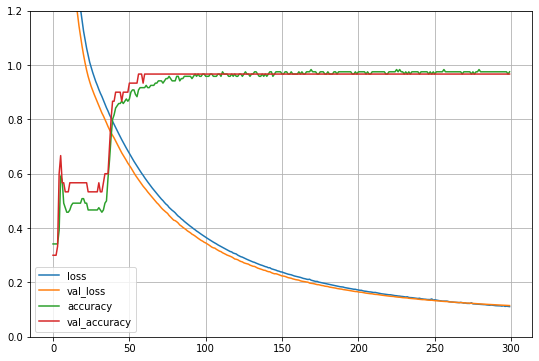

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.ylim(0, 1.2)
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()

In [11]:
score = Model_iris.evaluate(x_test, y_test, verbose=1)
print('정답률 :', score[1], 'loss :', score[0])

1/1 [==============================] - 0s 16ms/step - loss: 0.1149 - accuracy: 0.9667
정답률 : 0.9666666388511658 loss : 0.11493886262178421
